In [1]:
import sys
print(sys.version)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
folder = 'Baza_zdjec_przerobiona/s'
folder_docelowy = '../../Dane/Baza_zdjec_przeplatane_2/'
slesh = '/'
png = '.png'

In [4]:
#Tablica przechowująca zdjęcia osób
people = []
for i in range(1,41):
    images = []
    for j in range(1,141):
        im = Image.open('../Zdjecia/'+folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images.append(arr_im) 
    people.append(images)

In [5]:
w, h = 64, 128
data = np.zeros((h, w), dtype=np.uint8)

In [6]:
#Laczna ilosc zdjec
lacznie = 25200

ilosc = 40
rozmiar = 10
poloczone = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'lacznie'
tab = np.zeros(lacznie, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(ilosc):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                
                a = 0
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(len(people[i][j+l])):
                    p = 2*p
                    data[p] = people[i][j+l][a]
                    data[p+1] = people[i][9-k+l][a]
                    a = a + 1
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(data)
                con.save(folder_docelowy+str(n)+png) 
      
                poloczone.append(con)
                tab[n] = 1
                n = n + 1   
print(n)

12600


In [7]:
#Tworzenie próbek negatywnych
w, h = 64, 128

x = 0 #Licznik 

m = 41
rozne = []


for i in range(40):

    rand_1 = random.randint(0,8)
    rand_2 = random.randint(0,8)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
            
                a = 0
                data = np.zeros((h, w), dtype=np.uint8)
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(w):
                    p = 2*p
                    data[p] = people[i][10*rand_1+j][a]
                    data[p+1] = people[i+k][10*rand_2+l][a]
                    a = a + 1
            
                con = Image.fromarray(data)
                            
                x = x + 1
                rozne.append(con)
print(x)

78000


In [8]:
for i in range(lacznie - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne[rand_1]
    
    con.save(folder_docelowy+str(n)+png) 
    
    poloczone.append(con)
    
    tab[n] = 0
    n = n + 1
    
print(n)

25200


In [9]:
#Zapis tablicy do pliku CSV
tab.tofile(folder_docelowy+'nowe.csv', sep = ' ')  

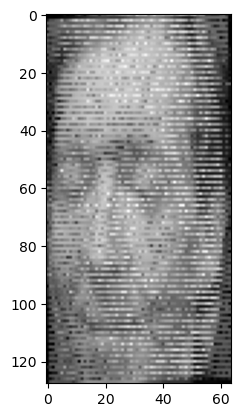

In [10]:
plt.imshow(rozne[144], cmap = 'gray')

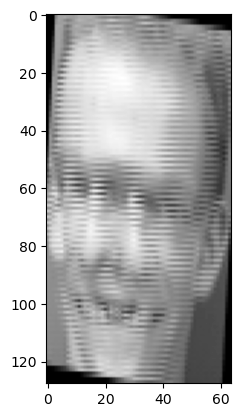

In [11]:
plt.imshow(poloczone[1542], cmap = 'gray')

In [12]:
w, h = 64, 64
data1 = np.zeros((w, h), dtype=np.uint8)
data2 = np.zeros((w, h), dtype=np.uint8)
                 
a = -1

img = np.array(poloczone[13000])
    
for o in range(h):
    a = a + 1
    data1[o] =  img[a]
    a = a + 1
    data2[o] =  img[a]
    
print(a)

127


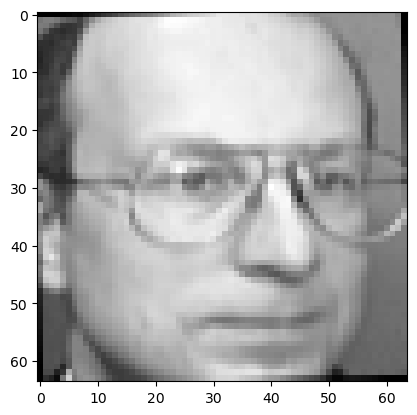

In [13]:
img1 = Image.fromarray(data1)
plt.imshow(img1, cmap = 'gray')

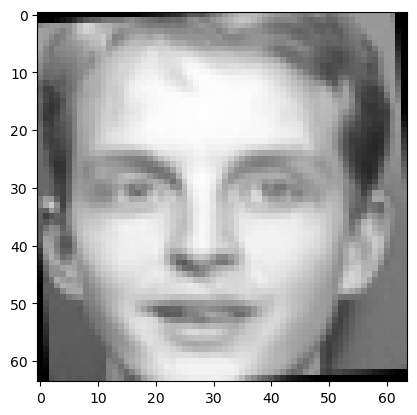

In [14]:
img2 = Image.fromarray(data2)
plt.imshow(img2, cmap = 'gray')